# TF-IDF

In [1]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# 피클 파일 로드
file_path = "C:\\Users\\Cloud\\Documents\\카카오톡 받은 파일\\total_doc.pkl"
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# TF-IDF 계산을 위해 명사들의 문자열 구성
doc_noun = []
for i in range(0, len(data['title_token_noun'])):
    title_noun = ' '.join(data['title_token_noun'][i])
    doc_noun.append(title_noun)
    
    doc_noun.append(' '.join(data['doc_token_noun'][i]))
    
    for comment_noun in data['comment_token_noun'][i]:
        doc_noun.append(' '.join(comment_noun))

# 텍스트 문서 모음을 단어 TF-IDF 행렬로 변환
vec = TfidfVectorizer(min_df=0.01, max_df=0.95)
X = vec.fit_transform(doc_noun)

# 결과 확인
print(X)  # (문서 인덱스, 등장 단어 인덱스) TF-IDF 값

  (0, 39)	0.5695662257767665
  (0, 42)	0.5757534313747663
  (0, 11)	0.5866023360971143
  (2, 27)	1.0
  (3, 5)	0.31637455614419546
  (3, 28)	0.16101554722687303
  (3, 41)	0.15875550167684752
  (3, 26)	0.12163147053826229
  (3, 1)	0.1591015277673094
  (3, 47)	0.8885807811948973
  (3, 27)	0.1381828824095101
  (22, 2)	1.0
  (23, 50)	0.10649865301311445
  (23, 53)	0.09559071709303638
  (23, 51)	0.29523608131168605
  (23, 46)	0.09999668268938487
  (23, 19)	0.10031406685454655
  (23, 22)	0.20940767754306702
  (23, 33)	0.17312547544001378
  (23, 57)	0.10573901802835915
  (23, 37)	0.09019070368842266
  (23, 8)	0.10007553418544765
  (23, 7)	0.09635507157066518
  (23, 58)	0.09559071709303638
  (23, 24)	0.09756240176704031
  :	:
  (16982, 60)	0.06667338963090104
  (16982, 53)	0.2784494770324557
  (16982, 22)	0.07624885040052685
  (16982, 8)	0.07287836362436789
  (16982, 58)	0.06961236925811393
  (16982, 56)	0.24635253243354094
  (16982, 14)	0.13806709327564884
  (16982, 35)	0.4244934405390397
  (1

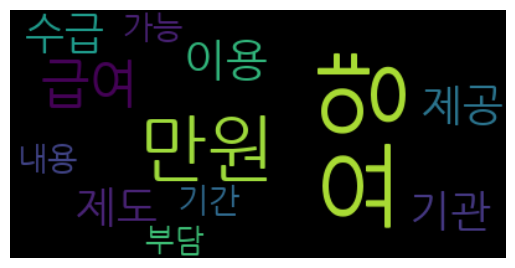

In [21]:
import numpy as np

# 전체 문서에 대한 단어별 TF-IDF 값을 딕셔너리로 저장
word_tfidf = {}
for doc_index, doc_vector in enumerate(X.toarray()):
    word_tfidf.update(dict(zip(words, doc_vector)))

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic.ttf')
wordcloud.generate_from_frequencies(word_tfidf)

# 워드 클라우드 시각화
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()